In [47]:
function sir_ode2(du,u,p,t)
    S,I,R = u
    b,g = p
    du[1] = -b*S*I
    du[2] = b*S*I-g*I
    du[3] = g*I
end
parms = [0.1,0.05]
init = [0.99,0.01,0.0]
tspan = (0.0,200.0)
sir_prob2 = ODEProblem(sir_ode2,init,tspan,parms)
sir_sol = solve(sir_prob2,saveat = 0.1)

retcode: Success
Interpolation: 1st order linear
t: 2001-element Vector{Float64}:
   0.0
   0.1
   0.2
   0.3
   0.4
   0.5
   0.6
   0.7
   0.8
   0.9
   ⋮
 199.2
 199.3
 199.4
 199.5
 199.6
 199.7
 199.8
 199.9
 200.0
u: 2001-element Vector{Vector{Float64}}:
 [0.99, 0.01, 0.0]
 [0.9899007620439206, 0.01004911526404097, 5.012269203835053e-5]
 [0.9898010467485492, 0.010098461713420163, 0.00010049153803066705]
 [0.9897008519670815, 0.010148040336446743, 0.00015110769647183207]
 [0.989600175544873, 0.01019785212459509, 0.00020197233053187715]
 [0.9894990153190228, 0.010247898072564106, 0.0002530866084130026]
 [0.9893973691183536, 0.010298179178280388, 0.00030445170336601107]
 [0.9892952347634115, 0.01034869644289822, 0.0003560687936903061]
 [0.9891926100664665, 0.010399450870799583, 0.00040793906273389383]
 [0.9890894928315125, 0.01045044346959414, 0.00046006369889337886]
 ⋮
 [0.2100860498388935, 0.014812841365666572, 0.7751011087954401]
 [0.21005497749129043, 0.014769956774020545, 0.775

In [ ]:
plot(sir_sol, xaxis= "Time", yaxis= "number", label = ["dS, dI, dR"])

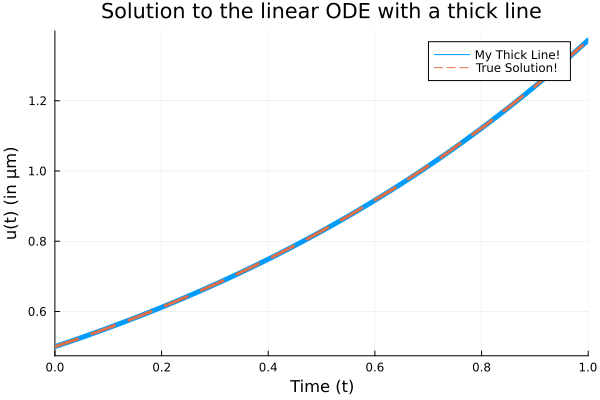

In [5]:
using DifferentialEquations
f(u,p,t) = 1.01*u
u0 = 1/2
tspan = (0.0,1.0)
prob = ODEProblem(f,u0,tspan)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

using Plots
plot(sol,linewidth=5,title="Solution to the linear ODE with a thick line",
     xaxis="Time (t)",yaxis="u(t) (in μm)",label="My Thick Line!") # legend=false
plot!(sol.t, t->0.5*exp(1.01t),lw=3,ls=:dash,label="True Solution!")

In [51]:
function sis_ode(du,u,p,t)
    SH,IH,SL,IL = u
    betaHH,betaHL,betaLH,betaLL,gamma=p
    du[1]=-(betaHH*IH+betaHL*IL)*SH+gamma*IH
    du[2]=+(betaHH*IH+betaHL*IL)*SH-gamma*IH
    du[3]=-(betaLH*IH+betaLL*IL)*SL+gamma*IL
    du[4]=+(betaLH*IH+betaLL*IL)*SL-gamma*IL
end

sis_ode (generic function with 1 method)

In [52]:
parms =[10,0.1,0.1,1,1]
init=[0.19999,0.00001,0.799,0.001]
tspan=tspan = (0.0,15.0)

(0.0, 15.0)

In [53]:
sis_prob = ODEProblem(sis_ode,init,tspan,parms)
sis_sol = solve(sis_prob,saveat=0.1)

retcode: Success
Interpolation: 1st order linear
t: 151-element Vector{Float64}:
  0.0
  0.1
  0.2
  0.3
  0.4
  0.5
  0.6
  0.7
  0.8
  0.9
  ⋮
 14.2
 14.3
 14.4
 14.5
 14.6
 14.7
 14.8
 14.9
 15.0
u: 151-element Vector{Vector{Float64}}:
 [0.19999, 1.0e-5, 0.799, 0.001]
 [0.19998686569142285, 1.3134308577147971e-5, 0.799019807006262, 0.0009801929937381223]
 [0.19998344308576305, 1.6556914236958096e-5, 0.7990391920816711, 0.0009608079183289639]
 [0.19997970098244397, 2.0299017556046098e-5, 0.7990581613316069, 0.0009418386683931482]
 [0.19997560516722707, 2.4394832772938123e-5, 0.7990767204868054, 0.0009232795131945503]
 [0.19997111751660585, 2.8882483394162185e-5, 0.7990948748544864, 0.0009051251455136423]
 [0.19996619578505184, 3.380421494815943e-5, 0.7991126293074815, 0.0008873706925185745]
 [0.19996079360501473, 3.920639498528369e-5, 0.7991299882842349, 0.0008700117157651761]
 [0.19995485986539335, 4.514013460666193e-5, 0.7991469557521774, 0.0008530442478226568]
 [0.1999483383507271

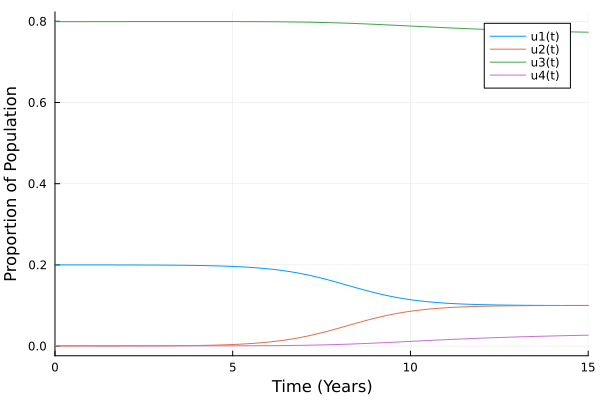

In [54]:
plot(sis_sol,xlabel="Time (Years)",ylabel="Proportion of Population")

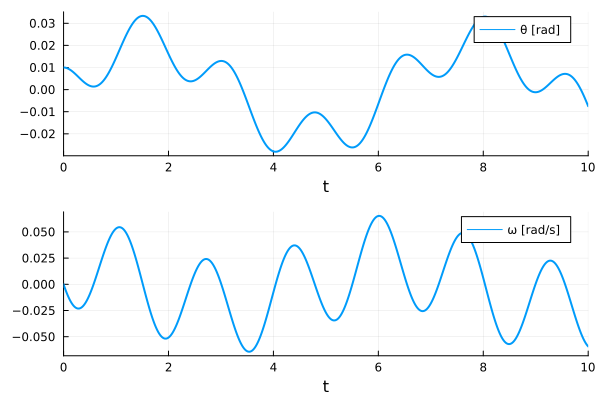

In [17]:
using DifferentialEquations
using Plots

l = 1.0                             # length [m]
m = 1.0                             # mass [kg]
g = 9.81                            # gravitational acceleration [m/s²]

function pendulum!(du,u,p,t)
    du[1] = u[2]                    # θ'(t) = ω(t)
    du[2] = -3g/(2l)*sin(u[1]) + 3/(m*l^2)*p(t) # ω'(t) = -3g/(2l) sin θ(t) + 3/(ml^2)M(t)
end

θ₀ = 0.01                           # initial angular deflection [rad]
ω₀ = 0.0                            # initial angular velocity [rad/s]
u₀ = [θ₀, ω₀]                       # initial state vector
tspan = (0.0,10.0)                  # time interval

M = t->0.1sin(t)                    # external torque [Nm]

prob = ODEProblem(pendulum!,u₀,tspan,M)
sol = solve(prob)

plot(sol,linewidth=2,xaxis="t",label=["θ [rad]" "ω [rad/s]"],layout=(2,1))

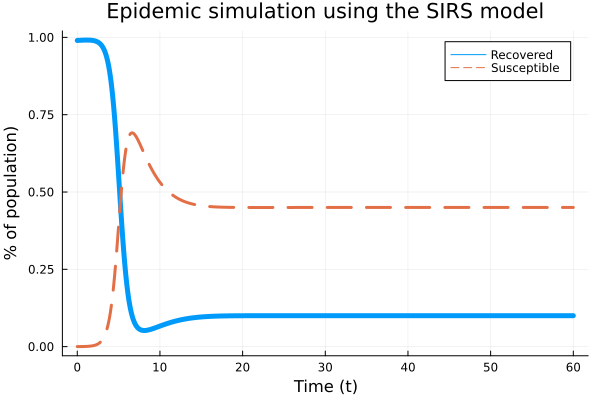

In [21]:
function sirs(; beta, gamma, delta)
    function f!(du,u,p,t)
        du[1] = gamma * (1 - u[1] - u[2]) - beta * u[1] * u[2]
        du[2] = beta * u[1] * u[2] - gamma * u[2]
    end

    u0 = [0.99; 0.0001]
    tspan = (0.0,60.0)
    prob = ODEProblem(f!,u0,tspan)
    u = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)   # Fifth order Tsitouras method
    u0 = [ elem[1] for elem in u.u]
    u1 = [ elem[2] for elem in u.u]

    plot(u.t, u0,linewidth=5,title="Epidemic simulation using the SIRS model",
         xaxis="Time (t)",yaxis="% of population)",label="Recovered") # legend=false
    plot!(u.t, u1,lw=3,ls=:dash,label="Susceptible")
end

sirs( beta = 2.0, gamma = 0.2, delta = 0.1)

In [65]:
# Set the required model parameters for the SIRS model with two levels of transmission - Within and between households
N = 10; # Household size - Change to 10 for final analysis
betaHH = 6; # Within household transmission parameter
betaG = 1; # Population wide transmission
gamma = 1; # Rate of recovery from infection
tau = 1; # Rate of loss of protection
params = [betaHH,gamma,tau,betaG,N]; # Put all the parameters together
time = (0.0, 30.0) # Simulation time - note it defined as a float
dim = dim = 0.5*(N+1)*(N+2); # Number of possible configurations - works for three epidemiological classes
y0 = vec(zeros(1,dim)); # Initial condition vector
y0[end-1] = 0.00000001;
y0[end] = 0.99999999;

MethodError: MethodError: no method matching zeros(::Int64, ::Float64)
Closest candidates are:
  zeros(!Matched::AbstractRNG, ::Any...; kwargs...) at C:\Users\olarinoyem\.julia\packages\Lux\TVdTD\src\utils.jl:28
  zeros(!Matched::Union{Integer, AbstractUnitRange}...) at array.jl:583

In [62]:
function hhTransitions(N,dim)
    # Function to generate transition matrices for household model
    # Input: N is the household size
    
    # Initialize things
    Qinf = zeros(dim,dim);
    Qrec = zeros(dim,dim);
    Qext = zeros(dim,dim);
    Qwane = zeros(dim,dim);
    dataI = Array{Int64}(zeros(dim,3))
    m = 0;
    I = Array{Int64}(zeros(N+1,N+1))
    
    # To help remember where to store the variables
    for ss = 0:N
        for ii = 0:(N-ss)
            m = m + 1;
            I[ss+1,ii+1] = m
        end
    end
    
    # Describe the epidemiological transitions
    
    # Counter for susceptibles
    for ss = 0:N
        # Counter for infecteds
        for ii = 0:(N-ss) 
            # If susceptibles and infecteds are more than 1, then infection within the household can occur
            if (ss > 0 && ii > 0) 
                Qinf[I[ss+1,ii+1],I[ss,ii+2]] = ii*ss/(N-1);
            end
            
            # If infecteds are more than 1, recovery can occur
            if ii > 0
                # Rate of recovery
                Qrec[I[ss+1,ii+1],I[ss+1,ii]] = ii; 
            end
            
            # For external infection - just keep track of susceptibles
            if ss > 0           
                # Rate of within household infection
                Qext[I[ss+1,ii+1],I[ss,ii+2]] = ss;           
            end
            
            # Loss of protection hence becoming susceptible again. Possible if N-ss-ii = rr > 0 
            if (N-ss-ii) > 0
                # Rate of loss of protection
                Qwane[I[ss+1,ii+1],I[ss+2,ii+1]] = N-ss-ii;
            end
            
            # Store the relevant indices to help identify the household configurations
            dataI[I[ss+1,ii+1],:] = [ss, ii, N-ss-ii];
        end
    end
    
    Qinf = Qinf - diagm(vec(sum(Qinf,2)),0);
    Qrec = Qrec - diagm(vec(sum(Qrec,2)),0);
    Qext = Qext - diagm(vec(sum(Qext,2)),0);
    Qwane = Qwane - diagm(vec(sum(Qwane,2)),0);
    
    # Return
    return Qinf, Qrec, Qext, Qwane, dataI
end
Qinf, Qrec, Qext, Qwane, dataI = hhTransitions(N,dim);

MethodError: MethodError: no method matching zeros(::Float64, ::Float64)
Closest candidates are:
  zeros(!Matched::AbstractRNG, ::Any...; kwargs...) at C:\Users\olarinoyem\.julia\packages\Lux\TVdTD\src\utils.jl:28

In [28]:
x,t = sir(s0 = 0.99, beta = 0.5, gamma = gamma_val, r0 = r0_val)
plot(t, x,linewidth=5,title="Epidemic simulation using the SIR model", linecolor="steelblue",
        xaxis="Time (t)",yaxis="% of population that is infected",label="Baseline of beta = 0.5") # legend=false

count = 0.1
for i in 1.0: 0.5 :3.0
    x,t = sir(s0 = 0.99, beta = i, gamma = gamma_val, r0 = r0_val)
    #print(t)
    a = plot!(t, x,lw=3,label=i, linecolor=cgrad(g)[count]) # legend=false
    count += 0.1
end
display(a)

MethodError: MethodError: no method matching similar(::Float64, ::Type{Float64})
Closest candidates are:
  similar(!Matched::Union{LinearAlgebra.Adjoint{T, var"#s885"}, LinearAlgebra.Transpose{T, var"#s885"}} where {T, var"#s885"<:(AbstractVector)}, ::Type{T}) where T at C:\Users\olarinoyem\AppData\Local\Programs\Julia-1.8.2\share\julia\stdlib\v1.8\LinearAlgebra\src\adjtrans.jl:207
  similar(!Matched::Union{LinearAlgebra.Adjoint{T, S}, LinearAlgebra.Transpose{T, S}} where {T, S}, ::Type{T}) where T at C:\Users\olarinoyem\AppData\Local\Programs\Julia-1.8.2\share\julia\stdlib\v1.8\LinearAlgebra\src\adjtrans.jl:211
  similar(!Matched::Union{LinearAlgebra.Adjoint{T, S}, LinearAlgebra.Transpose{T, S}} where {T, S}, ::Type{T}, !Matched::Tuple{Vararg{Int64, N}}) where {T, N} at C:\Users\olarinoyem\AppData\Local\Programs\Julia-1.8.2\share\julia\stdlib\v1.8\LinearAlgebra\src\adjtrans.jl:212
  ...

In [26]:
# Estimates for gamma and beta for COVID obtained from https://arxiv.org/pdf/2002.06563.pdf
# Epidemic analysis of COVID-19 in China by dynamical modeling
# Liangrong Peng, Wuyue Yang, Dongyan Zhang, Changjing Zhuge, Liu Hong
# medRxiv 2020.02.16.20023465; doi: https://doi.org/10.1101/2020.02.16.20023465
# Estimate for gamma for flu was not available

beta_val(;R0, gamma) = R0 * gamma
cv = beta_val(R0 = 2.2, gamma = 0.5) 
fl = beta_val(R0 = 1.3, gamma = 0.5)

sir(s0 = 0.99, beta = cv, gamma = 0.5, r0 = 0.0001, title="Coronavirus - SIR simulation with estimated parameters")

UndefKeywordError: UndefKeywordError: keyword argument delta not assigned

In [33]:
using Optim

# c is the mean degree of the random network
c_baseline = 1.5
c_end = 4.0

# Newton's solve 
function solve_S(;c,phi)
    f(S) = 1 - exp(-phi*c*S) - S# Function
    df(S) = c * phi * exp(-phi * c * S) - 1

    S_iter = 0.5
    for i in 1 : 300
        delS = -f(S_iter) / df(S_iter)
        S_iter += delS 
    end
    
    return(S_iter)
end

r = [ solve_S(c = c_baseline, phi = i) for i in 0:0.01:1]
plot([0: 0.01: 1], r,linewidth=5,title="Outbreak size for varying 'mean degree' of the network", linecolor="steelblue",
         xaxis="Phi or the transmission probability",yaxis="% of population that is infected",label="Baseline of c = 1.5") # legend=false

count = 0.1
for c in c_baseline + 0.5: 0.5: c_end
    r = [ solve_S(c = c, phi = i) for i in 0 : 0.01 : 1]
    a = plot!([0: 0.01: 1], r, lw=3, label=c, linecolor=cgrad(g)[count]) # legend=false
    count += 0.1
end


In [36]:
function lorenz(u,p,t)
    dx = 10.0*(u[2]-u[1])
    dy = u[1]*(28.0-u[3]) - u[2]
    dz = u[1]*u[2] - (8/3)*u[3]
    [dx,dy,dz]
   end

lorenz (generic function with 1 method)

In [39]:
using DifferentialEquations, BenchmarkTools
u0 = [1.0;0.0;0.0]
tspan = (0.0,100.0)
prob = ODEProblem(lorenz,u0,tspan)
@benchmark solve(prob,Tsit5())

BenchmarkTools.Trial: 254 samples with 1 evaluation.
 Range (min … max):   3.346 ms … 634.409 ms  ┊ GC (min … max):  0.00% … 96.23%
 Time  (median):     10.694 ms               ┊ GC (median):     0.00%
 Time  (mean ± σ):   19.007 ms ±  50.261 ms  ┊ GC (mean ± σ):  22.46% ± 13.72%

  ▇█▆▇▆▅▃▂                                                      
  ████████▆▄▇▆▇▇▁▄▁▁▄▁▆▁▁▁▁▁▁▁▄▁▁▁▁▄▁▁▁▁▄▁▁▁▁▁▄▁▁▁▁▁▁▁▁▄▁▁▁▁▁▄ ▆
  3.35 ms       Histogram: log(frequency) by time       141 ms <

 Memory estimate: 7.82 MiB, allocs estimate: 101102.

In [4]:
import Pkg
Pkg.add("StatsPlots")
#Pkg.add("RDatasets")

   Resolving package versions...

   Installed FFTW ────────────── v1.5.0


   Installed IntelOpenMP_jll ─── v2018.0.3+2
   Installed MKL_jll ─────────── v2022.2.0+0


   Installed Ratios ──────────── v0.4.3


   Installed NearestNeighbors ── v0.4.12
   Installed DataValues ──────── v0.4.13
   Installed StatsPlots ──────── v0.15.4


   Installed Clustering ──────── v0.14.3


   Installed FFTW_jll ────────── v3.3.10+0


   Installed Arpack_jll ──────── v3.5.1+1


   Installed KernelDensity ───── v0.6.5
   Installed Widgets ─────────── v0.6.6


   Installed MultivariateStats ─ v0.10.0


   Installed TableOperations ─── v1.2.0


   Installed Arpack ──────────── v0.5.3


   Installed AxisAlgorithms ──── v1.0.1
   Installed Observables ─────── v0.5.2
   Installed WoodburyMatrices ── v0.5.5


   Installed Interpolations ──── v0.14.6


    Updating `C:\Users\olarinoyem\.julia\environments\v1.8\Project.toml`
  [f3b207a7] + StatsPlots v0.15.4
    Updating `C:\Users\olarinoyem\.julia\environments\v1.8\Manifest.toml`

  [7d9fca2a] + Arpack v0.5.3
  [13072b0f] + AxisAlgorithms v1.0.1
  [aaaa29a8] + Clustering v0.14.3
  [e7dc6d0d] + DataValues v0.4.13
  [7a1cc6ca] + FFTW v1.5.0
  [a98d9a8b] + Interpolations v0.14.6
  [5ab0869b] + KernelDensity v0.6.5
  [6f286f6a] + MultivariateStats v0.10.0
 

 [b8a86587] + NearestNeighbors v0.4.12
  [510215fc] + Observables v0.5.2
  [c84ed2f1] + Ratios v0.4.3
  [f3b207a7] + StatsPlots v0.15.4
  [ab02a1b2] + TableOperations v1.2.0
  [cc8bc4a8] + Widgets v0.6.6
  [efce3f68] + WoodburyMatrices v0.5.5
⌅ [68821587] + Arpack_jll v3.5.1+1
  [f5851436] + FFTW_jll v3.3.10+0
  [1d5cc7b8] + IntelOpenMP_jll v2018.0.3+2
  [856f044c] + MKL_jll v2022.2.0+0
        Info Packages marked with ⌅ have new versions available but compatibility constraints restrict them from upgrading. To see why use `status --outdated -m`


Precompiling project...

  ✓ Observables

  ✓ DataValues

  ✓ Ratios
  ✓ WoodburyMatrices
  ✓ TableOperations


  ✓ FFTW_jll
  ✓ IntelOpenMP_jll


  ✓ Arpack_jll


  ✓ Widgets


  ✓ NearestNeighbors


  ✓ AxisAlgorithms


  ✓ MKL_jll


  ✓ Arpack


  ✓ Clustering

  ✓ MultivariateStats


  ✓ Interpolations


  ✓ FFTW


  ✓ KernelDensity


  ✓ StatsPlots
  19 dependencies successfully precompiled in 52 seconds. 388 already precompiled.
